In [1]:
import pandas as pd
import numpy as np

# Create DF

In [2]:
# read_clipboard - whatever you have recently copied can be read into a dataframe with read_clipboard()
# read_csv - Bring a CSV into a dataframe
# read_excel - Bring an Excel file / sheet into a dataframe
# read_feather - Feather is a fast and lightweight alternative to CSVs
# read_fwf - Read in a fixed-width-format text file (similiar to CSV but instead of delimiter, it uses fixed width)
# read_gbq - Reads in Google Big Query Table
# read_hdf - Reads in a .h5 file
# read_html - reads table from a website
# read_json - Converts Pandas string to pandas object
# read_orc - Reads in Apache ORC columnar file type that is common to the Hadoop ecosystems
# read_parquet - Reads in AWS parquet file
# read_pickle - Read in a serialised python object structure
# read_sas - Read SAS files stored as either XPORT or SAS7BDAT format files
# read_spss - Read in an SPSS file from the file path
# read_sql_table - Reads in a whole sql table
# read_sql_query - Reads in a sql query, when you pass in con
# read_sql - wrapper around read_sql_table and read_sql_query
# read_stata - Opens files that are .dta
# read_table - Read in a general delimited file

# ---------------------

# export and import a zipfile
import zipfile

# zipped = zipfile.ZipFile('my_file.zip')
# df_zf = pd.read_csv(zipped.open('my_file.zip'))
# df_zf

# ---------------------

# Empty Dataframe
df = pd.DataFrame()

# Dataframe from List
data = [10,20,30,40,50,60]
df = pd.DataFrame(data, columns=['Numbers'])

# Dataframe from list of lists
data = [['tom', 10], ['nick', 15], ['juli', 14]]
df = pd.DataFrame(data, columns=['Name', 'Age'])

# Dataframe from dictionary
data = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'Age': [20, 21, 19, 18]}
df = pd.DataFrame(data)

# Dataframe from List of Dictionaries
data = [{'a': 1, 'b': 2, 'c': 3},
        {'a': 10, 'b': 20, 'c': 30}]
df = pd.DataFrame(data)

# Dataframe from Series
ser = pd.Series([10,20,30,40,50,60])
df = ser.to_frame()

# Dataframe from Numpy array 
nump = np.array([10,20,30,40,50,60])
nump = pd.Series(nump).to_frame()
nump



,0
0,10
1,20
2,30
3,40
4,50
5,60


### Data Load in for examples

In [3]:
sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")
product_lookup = pd.read_excel("fake_data.xlsx", sheet_name="product_lookup")
store_lookup = pd.read_excel("fake_data.xlsx", sheet_name="store_lookup")
archived_sales_table = pd.read_excel("fake_data.xlsx", sheet_name="old_sales_table")

# Explore DF

In [4]:
# pd.options.display

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 100
pd.options.display.max_info_columns
pd.options.display.precision

from IPython.display import display, HTML
display(HTML("<style>.container { width: 70% } </style>"))

In [5]:
# See all tabs in Excel file

xl = pd.ExcelFile('fake_data.xlsx')
xl.sheet_names

['sales_table', 'product_lookup', 'store_lookup', 'old_sales_table']

In [6]:
# Head

sales_table.head(1)

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
0,2009-06-11 17:30:23,R'-*^obert's Store,Potatos,3.4,1255.0,4267.0,NaN,Very Happy


In [7]:
# Tail
sales_table.tail(1)

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
7175,2024-03-18 09:55:20.601,Petrol Station,Banana,9.0,1455.0,13095.0,NaN,Angry


In [8]:
# DF.Sample(n=3)
sales_table.sample(n=3)

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
4025,2010-07-23 06:19:20.601,Roger's Store,Spinach,1.02,3161.0,3224.22,NaN,Not Happy
4302,2010-08-20 05:46:13.401,Petrol Station,Banana,9.00,1752.0,15768.00,NaN,OK
1760,2009-12-06 11:57:44.600,Seven Eleven,Banana,9.00,2347.0,21123.00,NaN,Not Happy


In [9]:
# Datatypes
sales_table.dtypes

date               datetime64[ns]
store                      object
Product                    object
Price                     float64
Volume                    float64
Sales                     float64
recalled                   object
customer_rating            object
dtype: object

In [10]:
# Size
sales_table.size

57408

In [11]:
# Shape
sales_table.shape

(7176, 8)

In [12]:
# Info()
sales_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             7176 non-null   datetime64[ns]
 1   store            7176 non-null   object        
 2   Product          7176 non-null   object        
 3   Price            7176 non-null   float64       
 4   Volume           6937 non-null   float64       
 5   Sales            6937 non-null   float64       
 6   recalled         7 non-null      object        
 7   customer_rating  7166 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 448.6+ KB


In [13]:
# Describe()
sales_table.describe()

,Price,Volume,Sales
count,7176.000000,6937.000000,6937.000000
mean,3.949989,1585.134496,6269.887655
std,3.047500,920.820025,6680.432938
min,1.020000,0.000000,0.000000
25%,2.300000,785.000000,1745.700000
50%,3.400000,1589.000000,3845.400000
75%,9.000000,2389.000000,7898.200000
max,9.000000,3180.000000,28611.000000


In [14]:
# Unique
sales_table["Product"].unique()

array(['Potatos', 'Banana', 'Carrots', 'Spinach'], dtype=object)

In [15]:
# Nunique 
sales_table["Product"].nunique()

4

In [16]:
# Check for Nulls

sales_table.isnull().sum()

date                  0
store                 0
Product               0
Price                 0
Volume              239
Sales               239
recalled           7169
customer_rating      10
dtype: int64

# Clean DF

In [17]:
# Modify Datatypes

new_df = sales_table.copy()

new_df["to_str"] = new_df["Price"].astype('str')
new_df["back_to_number"] = pd.to_numeric(new_df["to_str"]) 
new_df["to_int"] = new_df["Volume"].fillna(0).astype('int')
new_df["back_to_float"] = new_df["to_int"].astype('float')
new_df["date_to_str"] = new_df["date"].astype('str')
new_df["str_to_datetime"] = pd.to_datetime(new_df["date_to_str"])
new_df["to_boolean"] = new_df["recalled"].astype('bool')


# Convert series into holding a list
from ast import literal_eval
new_df["a_list"] = str(["a", "b", "c"])
new_df["a_list"] = new_df["a_list"].apply(literal_eval)


# Categorical
new_df["categorical"] = pd.Categorical(new_df["Product"])
new_df["categorical_codes"] = new_df["categorical"].cat.codes

new_df

,date,store,Product,Price,Volume,Sales,recalled,customer_rating,to_str,back_to_number,to_int,back_to_float,date_to_str,str_to_datetime,to_boolean,a_list,categorical,categorical_codes
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy,3.4,3.40,1255,1255.0,2009-06-11 17:30:23.000,2009-06-11 17:30:23.000,True,"[a, b, c]",Potatos,2
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,NaN,Not Happy,9.0,9.00,2887,2887.0,2009-06-11 20:08:47.000,2009-06-11 20:08:47.000,True,"[a, b, c]",Banana,0
2,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,NaN,Happy,2.3,2.30,2740,2740.0,2009-06-11 22:34:13.400,2009-06-11 22:34:13.400,True,"[a, b, c]",Carrots,1
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,NaN,OK,3.4,3.40,1228,1228.0,2009-06-12 00:59:39.800,2009-06-12 00:59:39.800,True,"[a, b, c]",Potatos,2
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,NaN,Angry,9.0,9.00,1511,1511.0,2009-06-12 03:25:06.200,2009-06-12 03:25:06.200,True,"[a, b, c]",Banana,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,NaN,Angry,9.0,9.00,1594,1594.0,2023-12-17 00:13:35.001,2023-12-17 00:13:35.001,True,"[a, b, c]",Banana,0
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,NaN,OK,9.0,9.00,634,634.0,2024-01-09 02:39:01.401,2024-01-09 02:39:01.401,True,"[a, b, c]",Banana,0
7173,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK,1.02,1.02,1903,1903.0,2024-02-01 05:04:27.801,2024-02-01 05:04:27.801,True,"[a, b, c]",Spinach,3
7174,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,NaN,Not Happy,1.02,1.02,1092,1092.0,2024-02-24 07:29:54.201,2024-02-24 07:29:54.201,True,"[a, b, c]",Spinach,3


In [18]:
# Replace Nulls

df_null = sales_table
print(df_null.isna().sum())

df_null.fillna(0, inplace=True)

print("-------------------")
print(df_null.isna().sum())

date                  0
store                 0
Product               0
Price                 0
Volume              239
Sales               239
recalled           7169
customer_rating      10
dtype: int64
-------------------
date               0
store              0
Product            0
Price              0
Volume             0
Sales              0
recalled           0
customer_rating    0
dtype: int64


In [19]:
# Remove Whitespace

df_whitespace = sales_table

print(df_whitespace["store"].unique())

df_whitespace["store"] = df_whitespace["store"].str.strip()

print("----------------------")
print(df_whitespace["store"].unique())

["R'-*^obert's Store" "Josh's Store" 'Seven Eleven' 'Petrol Station'
 '..Elmac Store' 'Mt. Nelson -Store-' '      Grand Store    '
 'Mountain Store' 'Go\n store' "Roger's Store"]
----------------------
["R'-*^obert's Store" "Josh's Store" 'Seven Eleven' 'Petrol Station'
 '..Elmac Store' 'Mt. Nelson -Store-' 'Grand Store' 'Mountain Store'
 'Go\n store' "Roger's Store"]


In [20]:
# Find and Replace

df_find_replace = sales_table
df_find_replace["new_store_name"] = df_find_replace["store"].str.replace("'-*^", "", regex=False)
df_find_replace.head(3)

,date,store,Product,Price,Volume,Sales,recalled,customer_rating,new_store_name
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.4,1255.0,4267.0,0,Very Happy,Robert's Store
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.0,2887.0,25983.0,0,Not Happy,Josh's Store
2,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.3,2740.0,6302.0,0,Happy,Robert's Store


## Columns

In [21]:
# Capitalisation

# lower-case for all columns
sales_table.columns = map(str.lower, sales_table.columns)

# Upper-case for all columns
sales_table.columns = map(str.upper, sales_table.columns)

# Capitilisation for all columns
sales_table.columns = map(str.capitalize, sales_table.columns)


sales_table.head(1)

,Date,Store,Product,Price,Volume,Sales,Recalled,Customer_rating,New_store_name
0,2009-06-11 17:30:23,R'-*^obert's Store,Potatos,3.4,1255.0,4267.0,0,Very Happy,Robert's Store


In [22]:
# Re-name Columns

sales_table.rename(columns={'Date': 'Dates'}, inplace=True)
sales_table.head(1)

,Dates,Store,Product,Price,Volume,Sales,Recalled,Customer_rating,New_store_name
0,2009-06-11 17:30:23,R'-*^obert's Store,Potatos,3.4,1255.0,4267.0,0,Very Happy,Robert's Store


In [23]:
# Sort Columns

# Re-Order alphabetically
sales_table = sales_table.reindex(sorted(sales_table.columns), axis=1)

# Re-Order manually with list
re_order = ['Dates','Product','Store', 'Customer_rating',  'Price',  'Recalled', 'Sales',  'Volume']
sales_table = sales_table.reindex(columns=re_order)


sales_table.head(1)

,Dates,Product,Store,Customer_rating,Price,Recalled,Sales,Volume
0,2009-06-11 17:30:23,Potatos,R'-*^obert's Store,Very Happy,3.4,0,4267.0,1255.0


In [24]:
# Drop Columns
sales_table["to_be_removed"] = "a"

sales_table.drop(columns=["to_be_removed"], inplace=True)

sales_table.head(1)

,Dates,Product,Store,Customer_rating,Price,Recalled,Sales,Volume
0,2009-06-11 17:30:23,Potatos,R'-*^obert's Store,Very Happy,3.4,0,4267.0,1255.0


## Rows

In [25]:
# Sort Rows

sales_table = sales_table.sort_values(by=["Sales", "Product"], ascending=[False,True])
sales_table

,Dates,Product,Store,Customer_rating,Price,Recalled,Sales,Volume
2824,2010-03-23 23:05:54.201,Banana,Go\n store,Happy,9.00,0,28611.0,3179.0
1551,2009-11-15 09:20:47.000,Banana,Roger's Store,Angry,9.00,0,28584.0,3176.0
6677,2011-04-17 02:46:13.401,Banana,Grand Store,Angry,9.00,0,28584.0,3176.0
1004,2009-09-21 03:25:06.200,Banana,Roger's Store,Happy,9.00,0,28575.0,3175.0
3763,2010-06-26 19:14:03.801,Banana,Josh's Store,OK,9.00,0,28566.0,3174.0
...,...,...,...,...,...,...,...,...
3285,2010-05-09 12:33:44.601,Spinach,Josh's Store,Angry,1.02,0,0.0,0.0
3287,2010-05-09 17:24:37.401,Spinach,Roger's Store,Very Happy,1.02,0,0.0,0.0
3289,2010-05-09 22:15:30.201,Spinach,Grand Store,Not Happy,1.02,0,0.0,0.0
3297,2010-05-10 17:39:01.401,Spinach,..Elmac Store,Happy,1.02,0,0.0,0.0


In [26]:
# Date Formatting

# The strftime() function is used to convert date and time objects to their string representation. 

date_format = sales_table

date_format["new_date_format"] = date_format["Dates"].dt.strftime('%d/%m/%y')
date_format["new_date_format2"] = date_format["Dates"].dt.strftime('%d/%b/%y')
date_format["new_date_format3"] = date_format["Dates"].dt.strftime('%d/%B/%y')
date_format["new_date_format4"] = date_format["Dates"].dt.strftime('%A/%b/%y')
date_format["new_date_format5"] = date_format["Dates"].dt.strftime('%A/%b/%Y')

date_format.head(4)

,Dates,Product,Store,Customer_rating,Price,Recalled,Sales,Volume,new_date_format,new_date_format2,new_date_format3,new_date_format4,new_date_format5
2824,2010-03-23 23:05:54.201,Banana,Go\n store,Happy,9.0,0,28611.0,3179.0,23/03/10,23/Mar/10,23/March/10,Tuesday/Mar/10,Tuesday/Mar/2010
1551,2009-11-15 09:20:47.000,Banana,Roger's Store,Angry,9.0,0,28584.0,3176.0,15/11/09,15/Nov/09,15/November/09,Sunday/Nov/09,Sunday/Nov/2009
6677,2011-04-17 02:46:13.401,Banana,Grand Store,Angry,9.0,0,28584.0,3176.0,17/04/11,17/Apr/11,17/April/11,Sunday/Apr/11,Sunday/Apr/2011
1004,2009-09-21 03:25:06.200,Banana,Roger's Store,Happy,9.0,0,28575.0,3175.0,21/09/09,21/Sep/09,21/September/09,Monday/Sep/09,Monday/Sep/2009


In [27]:
# String Split

string_split = sales_table

string_split["to_be_split"] = "I,am,comma"

string_split[["first", "second", "third"]] = string_split["to_be_split"].str.split(',', expand=True)
string_split["convert_split_to_list"] = string_split["to_be_split"].str.split(',', expand=False)
string_split["length"] = string_split["convert_split_to_list"].str.len()

string_split

,Dates,Product,Store,Customer_rating,Price,Recalled,Sales,Volume,new_date_format,new_date_format2,new_date_format3,new_date_format4,new_date_format5,to_be_split,first,second,third,convert_split_to_list,length
2824,2010-03-23 23:05:54.201,Banana,Go\n store,Happy,9.00,0,28611.0,3179.0,23/03/10,23/Mar/10,23/March/10,Tuesday/Mar/10,Tuesday/Mar/2010,"I,am,comma",I,am,comma,"[I, am, comma]",3
1551,2009-11-15 09:20:47.000,Banana,Roger's Store,Angry,9.00,0,28584.0,3176.0,15/11/09,15/Nov/09,15/November/09,Sunday/Nov/09,Sunday/Nov/2009,"I,am,comma",I,am,comma,"[I, am, comma]",3
6677,2011-04-17 02:46:13.401,Banana,Grand Store,Angry,9.00,0,28584.0,3176.0,17/04/11,17/Apr/11,17/April/11,Sunday/Apr/11,Sunday/Apr/2011,"I,am,comma",I,am,comma,"[I, am, comma]",3
1004,2009-09-21 03:25:06.200,Banana,Roger's Store,Happy,9.00,0,28575.0,3175.0,21/09/09,21/Sep/09,21/September/09,Monday/Sep/09,Monday/Sep/2009,"I,am,comma",I,am,comma,"[I, am, comma]",3
3763,2010-06-26 19:14:03.801,Banana,Josh's Store,OK,9.00,0,28566.0,3174.0,26/06/10,26/Jun/10,26/June/10,Saturday/Jun/10,Saturday/Jun/2010,"I,am,comma",I,am,comma,"[I, am, comma]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2010-05-09 12:33:44.601,Spinach,Josh's Store,Angry,1.02,0,0.0,0.0,09/05/10,09/May/10,09/May/10,Sunday/May/10,Sunday/May/2010,"I,am,comma",I,am,comma,"[I, am, comma]",3
3287,2010-05-09 17:24:37.401,Spinach,Roger's Store,Very Happy,1.02,0,0.0,0.0,09/05/10,09/May/10,09/May/10,Sunday/May/10,Sunday/May/2010,"I,am,comma",I,am,comma,"[I, am, comma]",3
3289,2010-05-09 22:15:30.201,Spinach,Grand Store,Not Happy,1.02,0,0.0,0.0,09/05/10,09/May/10,09/May/10,Sunday/May/10,Sunday/May/2010,"I,am,comma",I,am,comma,"[I, am, comma]",3
3297,2010-05-10 17:39:01.401,Spinach,..Elmac Store,Happy,1.02,0,0.0,0.0,10/05/10,10/May/10,10/May/10,Monday/May/10,Monday/May/2010,"I,am,comma",I,am,comma,"[I, am, comma]",3


In [28]:
# Dropna - from whole dataframe
sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")
print(len(sales_table))
print(len(sales_table.dropna(inplace=False)))


7176
7


In [29]:
# ffill - replaces Null with the value from the previous row

print(sales_table.isna().sum())

sales_table.ffill(inplace=True)

print(sales_table.isna().sum())

date                  0
store                 0
Product               0
Price                 0
Volume              239
Sales               239
recalled           7169
customer_rating      10
dtype: int64
date                0
store               0
Product             0
Price               0
Volume              0
Sales               0
recalled           43
customer_rating     0
dtype: int64


In [30]:
sales_table

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,NaN,Not Happy
2,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,NaN,Happy
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,NaN,OK
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,NaN,Angry
...,...,...,...,...,...,...,...,...
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,yes,Angry
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,yes,OK
7173,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK
7174,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,yes,Not Happy


In [31]:
# fillna - with the mean

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

print(sales_table.isna().sum())

sales_table.fillna(sales_table.mean(), inplace=True)

print(sales_table.isna().sum())

date                  0
store                 0
Product               0
Price                 0
Volume              239
Sales               239
recalled           7169
customer_rating      10
dtype: int64
date                  0
store                 0
Product               0
Price                 0
Volume                0
Sales                 0
recalled           7169
customer_rating      10
dtype: int64


<ipython-input-31-effbf32ef732>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  sales_table.fillna(sales_table.mean(), inplace=True)
<ipython-input-31-effbf32ef732>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_table.fillna(sales_table.mean(), inplace=True)


In [32]:
# fillna - with zeros

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

print(sales_table.isna().sum())

sales_table.fillna(0, inplace=True)

print(sales_table.isna().sum())

date                  0
store                 0
Product               0
Price                 0
Volume              239
Sales               239
recalled           7169
customer_rating      10
dtype: int64
date               0
store              0
Product            0
Price              0
Volume             0
Sales              0
recalled           0
customer_rating    0
dtype: int64


In [33]:
# Remove Duplicates

sales_table.drop_duplicates(keep='first', inplace=True)
sales_table.head(1)

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
0,2009-06-11 17:30:23,R'-*^obert's Store,Potatos,3.4,1255.0,4267.0,0,Very Happy


# Join DF

In [34]:
# Merge - Left, Right, Inner, Outer

left_new_df = pd.merge(left=sales_table,
                  right=store_lookup,
                  left_on='store',
                  right_on='store_name',
                 how='left')



right_new_df = pd.merge(left=product_lookup,
                  right=sales_table,
                  left_on='Product Name',
                  right_on='Product',
                 how='right', )

inner_new_df = pd.merge(right=sales_table,
                  left=store_lookup,
                  right_on='store',
                  left_on='store_name',
                 how='inner')


outer_new_df = pd.merge(right=sales_table,
                  left=store_lookup,
                  right_on='store',
                  left_on='store_name',
                 how='outer')


cross_new_df = pd.merge(right=sales_table,
                  left=store_lookup,
                 how='cross')

cross_new_df

,store_name,Address,Revenue,date,store,Product,Price,Volume,Sales,recalled,customer_rating
0,Josh's Store,23 Pitt Street,7344976.0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,0,Very Happy
1,Josh's Store,23 Pitt Street,7344976.0,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,0,Not Happy
2,Josh's Store,23 Pitt Street,7344976.0,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,0,Happy
3,Josh's Store,23 Pitt Street,7344976.0,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,0,OK
4,Josh's Store,23 Pitt Street,7344976.0,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,0,Angry
...,...,...,...,...,...,...,...,...,...,...,...
71755,Grand Store,55 Liverpool Street,4554526.0,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,0,Angry
71756,Grand Store,55 Liverpool Street,4554526.0,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,0,OK
71757,Grand Store,55 Liverpool Street,4554526.0,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK
71758,Grand Store,55 Liverpool Street,4554526.0,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,0,Not Happy


In [35]:
# Concat

archive_sales_table = pd.read_excel('fake_data.xlsx', sheet_name='old_sales_table')

print(len(sales_table))

large_sales_table = pd.concat([archive_sales_table, sales_table])

print(len(large_sales_table))

7176
14352


In [36]:
# Join

# The join() method inserts column(s) from another DataFrame, or Series.
# dataframe.join(other, on, how, lsuffix, rsuffix, sort)

# check = sales_table.join(archive_sales_table.set_index=(["date", "store", "product"]), on=["date", "store", "product"])

# check

# Add to DF

In [37]:
# Apply

def func(col):
    prod = col["Product"]
    price = col["Price"]
    
    if prod == 'Carrots':
        return price * 2
    else:
        return price
    
sales_table["new_price"] = sales_table.apply(lambda row: func(row), axis=1)

sales_table

,date,store,Product,Price,Volume,Sales,recalled,customer_rating,new_price
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,0,Very Happy,3.40
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,0,Not Happy,9.00
2,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,0,Happy,4.60
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,0,OK,3.40
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,0,Angry,9.00
...,...,...,...,...,...,...,...,...,...
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,0,Angry,9.00
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,0,OK,9.00
7173,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK,1.02
7174,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,0,Not Happy,1.02


In [38]:
# Get Dummies

dummies = sales_table

get_ = pd.get_dummies(dummies["Product"])
dummies = pd.concat([dummies, get_], axis=1)

dummies

,date,store,Product,Price,Volume,Sales,recalled,customer_rating,new_price,Banana,Carrots,Potatos,Spinach
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,0,Very Happy,3.40,0,0,1,0
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,0,Not Happy,9.00,1,0,0,0
2,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,0,Happy,4.60,0,1,0,0
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,0,OK,3.40,0,0,1,0
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,0,Angry,9.00,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,0,Angry,9.00,1,0,0,0
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,0,OK,9.00,1,0,0,0
7173,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK,1.02,0,0,0,1
7174,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,0,Not Happy,1.02,0,0,0,1


In [39]:
# Resample
# Change the frequency of dates and then aggregate a single series measure
# Helps interpret the data at a my reliable/consistent datetime 
# downsample = decrease frequency hour/sec
# upsample = increase to month/year

resample_table = sales_table

resample_table.set_index(["date"], inplace=True)

average_sales_by_year = resample_table["Price"].resample('Y').mean()

average_sales_by_year

date
2009-12-31    3.882822
2010-12-31    3.983708
2011-12-31    3.951956
2012-12-31    3.390000
2013-12-31    4.090000
2014-12-31    4.927500
2015-12-31    3.470000
2016-12-31    5.145000
2017-12-31    3.750667
2018-12-31    3.081250
2019-12-31    3.591250
2020-12-31    3.362500
2021-12-31    4.630000
2022-12-31    4.441333
2023-12-31    3.941250
2024-12-31    5.010000
Freq: A-DEC, Name: Price, dtype: float64

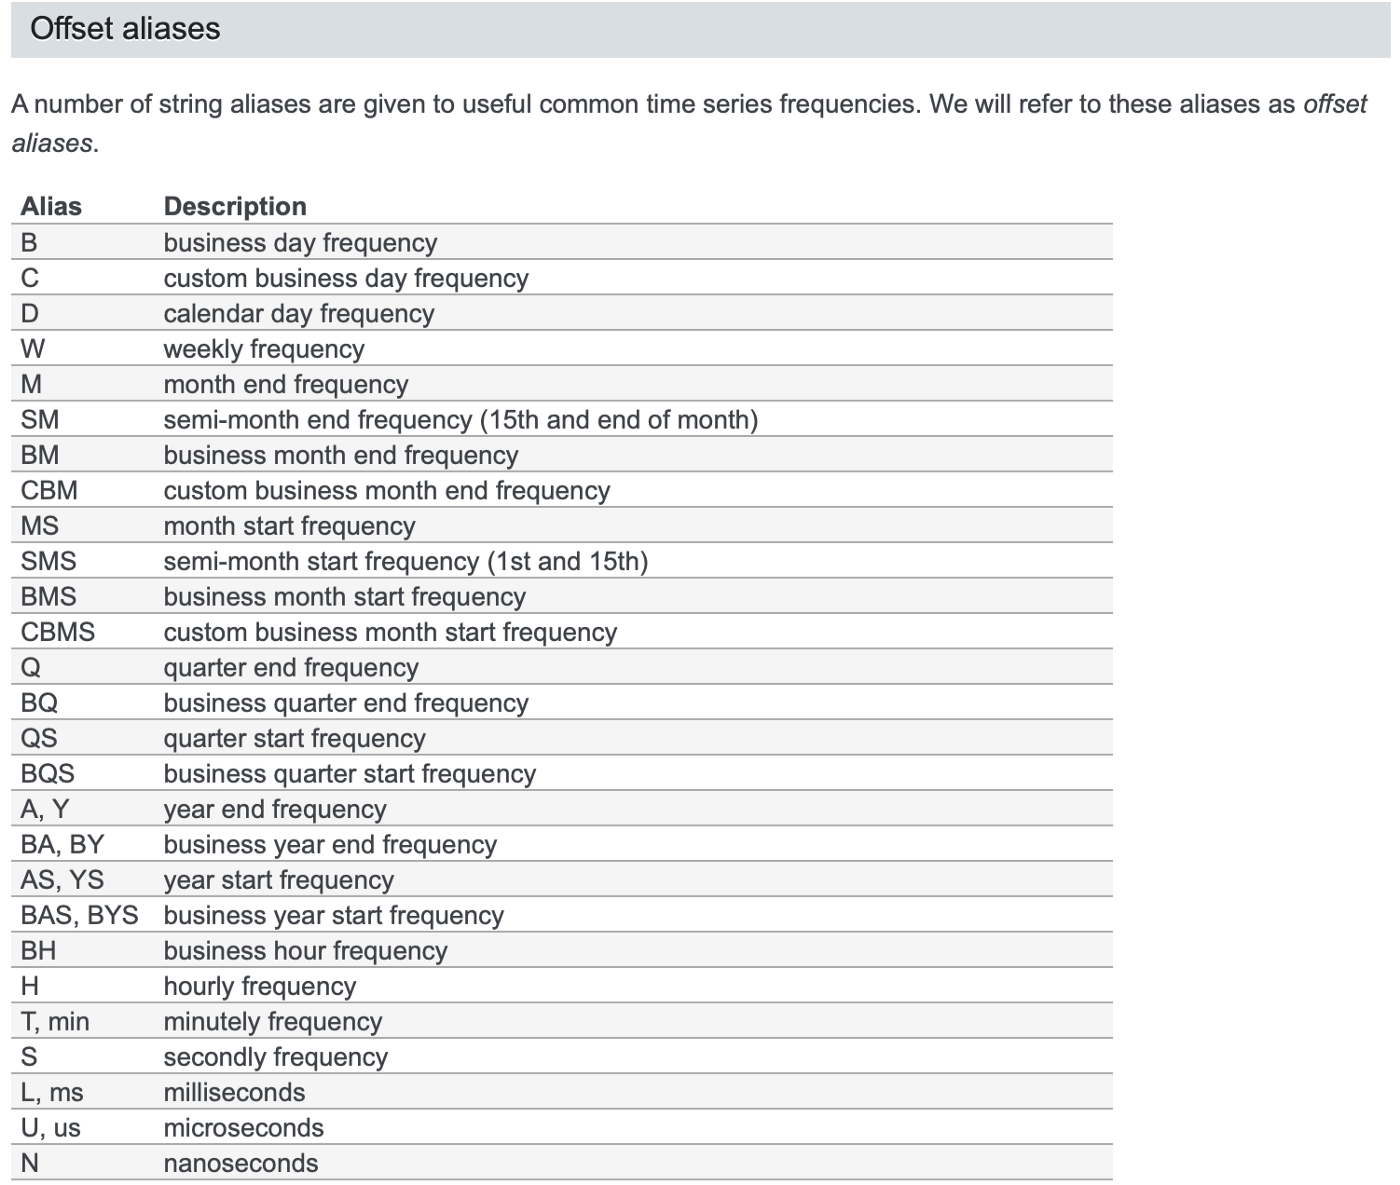

In [40]:
# Shift
# Useful to calculate difference vs. previous time period
# Useful if you want to add rows (with dates) before the dates you have shift = -1

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")


shift_ex = sales_table[["date", "Volume"]]

shift_ex.set_index("date", inplace=True)

shift_ex = shift_ex["Volume"].resample('Y').sum()

shift_ex = shift_ex.to_frame()

shift_ex.reset_index(inplace=True)

shift_ex["diff"] = shift_ex["Volume"] - shift_ex.shift(periods=1, fill_value=0)["Volume"]

shift_ex

<ipython-input-40-bbf3c8d74fcc>:18: FutureWarning: Passing <class 'int'> to shift is deprecated and will raise in a future version, pass Timestamp instead.
  shift_ex["diff"] = shift_ex["Volume"] - shift_ex.shift(periods=1, fill_value=0)["Volume"]


,date,Volume,diff
0,2009-12-31,3189957.0,3189957.0
1,2010-12-31,5365117.0,2175160.0
2,2011-12-31,2142185.0,-3222932.0
3,2012-12-31,17655.0,-2124530.0
4,2013-12-31,22335.0,4680.0
5,2014-12-31,27263.0,4928.0
6,2015-12-31,25752.0,-1511.0
7,2016-12-31,25332.0,-420.0
8,2017-12-31,27961.0,2629.0
9,2018-12-31,26885.0,-1076.0


In [41]:
# Diff

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

sales_table["diff"] = sales_table["Sales"].diff(1)

sales_table

,date,store,Product,Price,Volume,Sales,recalled,customer_rating,diff
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy,NaN
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,NaN,Not Happy,21716.00
2,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,NaN,Happy,-19681.00
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,NaN,OK,-2126.80
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,NaN,Angry,9423.80
...,...,...,...,...,...,...,...,...,...
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,NaN,Angry,11401.60
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,NaN,OK,-8640.00
7173,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK,-3764.94
7174,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,NaN,Not Happy,-827.22


In [42]:
# Percent Change

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

sales_table["diff"] = sales_table["Sales"].pct_change(1)

sales_table

,date,store,Product,Price,Volume,Sales,recalled,customer_rating,diff
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy,NaN
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,NaN,Not Happy,5.089290
2,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,NaN,Happy,-0.757457
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,NaN,OK,-0.337480
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,NaN,Angry,2.257089
...,...,...,...,...,...,...,...,...,...
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,NaN,Angry,3.872300
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,NaN,OK,-0.602258
7173,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK,-0.659821
7174,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,NaN,Not Happy,-0.426169


In [43]:
# Rolling
# https://pandas.pydata.org/docs/reference/window.html#api-functions-rolling


In [44]:
# Expanding

In [45]:
# Add dates date_range

dates = pd.date_range(start='1/1/2015', end='1/08/2018', freq="30min").to_frame()
dates.reset_index(inplace=True, drop=True)
dates.head(1)

,0
0,2015-01-01


In [46]:
# Datetime year
dates["year"] = dates[0].dt.year

dates["month"] = dates[0].dt.month

dates["day"] = dates[0].dt.day

dates["hour"] = dates[0].dt.hour

dates["second"] = dates[0].dt.second

dates.head(10)


,0,year,month,day,hour,second
0,2015-01-01 00:00:00,2015,1,1,0,0
1,2015-01-01 00:30:00,2015,1,1,0,0
2,2015-01-01 01:00:00,2015,1,1,1,0
3,2015-01-01 01:30:00,2015,1,1,1,0
4,2015-01-01 02:00:00,2015,1,1,2,0
5,2015-01-01 02:30:00,2015,1,1,2,0
6,2015-01-01 03:00:00,2015,1,1,3,0
7,2015-01-01 03:30:00,2015,1,1,3,0
8,2015-01-01 04:00:00,2015,1,1,4,0
9,2015-01-01 04:30:00,2015,1,1,4,0


In [47]:
# pandas.series.repeat

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

check = sales_table["Product"].unique()

check = pd.Series(check)


print(len(check))

check = check.repeat([2])

print(len(check))

check

4
8


0    Potatos
0    Potatos
1     Banana
1     Banana
2    Carrots
2    Carrots
3    Spinach
3    Spinach
dtype: object

In [48]:
# pandas.cut
# Used to segment and sort data into bins
# Changing continuous variable to categorical variable

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

sales_table["bins"] = pd.cut(sales_table["Volume"], 3, labels=["low", "med", "high"], ordered=False)

sales_table

,date,store,Product,Price,Volume,Sales,recalled,customer_rating,bins
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy,med
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,NaN,Not Happy,high
2,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,NaN,Happy,high
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,NaN,OK,med
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,NaN,Angry,med
...,...,...,...,...,...,...,...,...,...
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,NaN,Angry,med
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,NaN,OK,low
7173,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK,med
7174,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,NaN,Not Happy,med


In [49]:
sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

sales_table["bins"] = pd.qcut(sales_table["Volume"], 4, labels=["bottom 25", "50", "75", "Above 75"])

sales_table

,date,store,Product,Price,Volume,Sales,recalled,customer_rating,bins
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy,50
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,NaN,Not Happy,Above 75
2,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,NaN,Happy,Above 75
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,NaN,OK,50
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,NaN,Angry,50
...,...,...,...,...,...,...,...,...,...
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,NaN,Angry,75
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,NaN,OK,bottom 25
7173,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK,75
7174,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,NaN,Not Happy,50


In [50]:
# Rank
sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

sales_table["rank"] = sales_table["Volume"].rank(method='first', ascending=False)

sales_table.sort_values("Volume", ascending=False)


,date,store,Product,Price,Volume,Sales,recalled,customer_rating,rank
386,2009-07-20 17:23:11.000,..Elmac Store,Spinach,1.02,3180.0,3243.60,NaN,OK,1.0
6070,2011-02-14 19:24:08.601,Mountain Store,Carrots,2.30,3180.0,7314.00,NaN,Not Happy,2.0
2824,2010-03-23 23:05:54.201,Go\n store,Banana,9.00,3179.0,28611.00,NaN,Happy,3.0
3534,2010-06-03 16:08:18.201,R'-*^obert's Store,Spinach,1.02,3178.0,3241.56,NaN,Very Happy,4.0
5977,2011-02-05 09:58:13.401,Seven Eleven,Carrots,2.30,3178.0,7309.40,NaN,Not Happy,5.0
...,...,...,...,...,...,...,...,...,...
3299,2010-05-10 22:29:54.201,R'-*^obert's Store,Spinach,1.02,NaN,NaN,NaN,Very Happy,NaN
3300,2010-05-11 00:55:20.601,Roger's Store,Banana,9.00,NaN,NaN,NaN,Not Happy,NaN
3301,2010-05-11 03:20:47.001,Seven Eleven,Banana,9.00,NaN,NaN,NaN,Not Happy,NaN
3302,2010-05-11 05:46:13.401,Seven Eleven,Carrots,2.30,NaN,NaN,NaN,OK,NaN


# Filter DF

In [51]:
# Greater Than / Less Than

greater = sales_table[sales_table["Volume"] >= 1000]
lesser = sales_table[sales_table["Volume"] <= 1000]

greater_mean = sales_table[sales_table["Volume"] >= sales_table["Volume"].mean()]
greater_median = sales_table[sales_table["Volume"] >= sales_table["Volume"].median()]
greater_std = sales_table[sales_table["Volume"] >= sales_table["Volume"].std()]


In [52]:
# Isna, isnull, notna, notnull
isna = sales_table[sales_table["Volume"].isna()] 
isnull = sales_table[sales_table["Volume"].isnull()] 
notna = sales_table[sales_table["Volume"].notna()] 
notnull = sales_table[sales_table["Volume"].notnull()] 


In [53]:
# Filter on datetime range

# With date as index
sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")
sales_table.set_index("date", inplace=True)
sales_table['2020-01-01':'2021-01-02']

# Without date as index
sales_table.reset_index(inplace=True)
sales_table = sales_table[(sales_table["date"] >= '2020-01-01') & (sales_table["date"] <= '2021-01-02')]
sales_table

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
7109,2020-01-14 17:56:18.201,Seven Eleven,Potatos,3.40,1016.0,3454.40,NaN,Happy
7110,2020-02-06 20:21:44.601,Josh's Store,Potatos,3.40,1600.0,5440.00,NaN,OK
7111,2020-02-29 22:47:11.001,Mountain Store,Potatos,3.40,55.0,187.00,NaN,Happy
7112,2020-03-24 01:12:37.401,Go\n store,Carrots,2.30,982.0,2258.60,NaN,Not Happy
7113,2020-04-16 03:38:03.801,Seven Eleven,Spinach,1.02,237.0,241.74,NaN,Happy
7114,2020-05-09 06:03:30.201,Josh's Store,Banana,9.00,801.0,7209.00,NaN,Happy
7115,2020-06-01 08:28:56.601,Grand Store,Carrots,2.30,1819.0,4183.70,NaN,Angry
7116,2020-06-24 10:54:23.001,Roger's Store,Spinach,1.02,1799.0,1834.98,NaN,Happy
7117,2020-07-17 13:19:49.401,Josh's Store,Spinach,1.02,2940.0,2998.80,NaN,Happy
7118,2020-08-09 15:45:15.801,Josh's Store,Carrots,2.30,512.0,1177.60,NaN,Happy


In [54]:
# Multiiple Column filter
sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

# And
sales_table = sales_table[(sales_table['Volume'] >= 1000) & (sales_table['Volume'] <= 1005)]

# Or
sales_table = sales_table[(sales_table['customer_rating'] == 'Happy') | (sales_table['Volume'] >= 1000)]

sales_table

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
13,2009-06-13 01:14:03.800,Seven Eleven,Potatos,3.40,1000.0,3400.00,NaN,Happy
1022,2009-09-22 23:03:01.400,Roger's Store,Carrots,2.30,1004.0,2309.20,NaN,Not Happy
2085,2010-01-08 07:45:44.600,Mountain Store,Spinach,1.02,1003.0,1023.06,NaN,Angry
2589,2010-02-28 05:27:30.201,Josh's Store,Banana,9.00,1000.0,9000.00,NaN,OK
2902,2010-03-31 20:10:13.401,Go\n store,Spinach,1.02,1002.0,1022.04,NaN,OK
2910,2010-04-01 15:33:44.601,Petrol Station,Carrots,2.30,1001.0,2302.30,NaN,Happy
3029,2010-04-13 16:01:06.201,Josh's Store,Potatos,3.40,1000.0,3400.00,NaN,Angry
4159,2010-08-05 19:08:18.201,Mountain Store,Spinach,1.02,1003.0,1023.06,NaN,Angry
4823,2010-10-11 20:40:27.801,Mountain Store,Banana,9.00,1001.0,9009.00,NaN,Not Happy
4882,2010-10-17 19:41:25.401,Roger's Store,Banana,9.00,1005.0,9045.00,NaN,Angry


In [55]:
# Select Columns by Datatype

only_numbers = sales_table.select_dtypes(include=["float", "int"])
only_numbers

,Price,Volume,Sales
13,3.40,1000.0,3400.00
1022,2.30,1004.0,2309.20
2085,1.02,1003.0,1023.06
2589,9.00,1000.0,9000.00
2902,1.02,1002.0,1022.04
2910,2.30,1001.0,2302.30
3029,3.40,1000.0,3400.00
4159,1.02,1003.0,1023.06
4823,9.00,1001.0,9009.00
4882,9.00,1005.0,9045.00


In [56]:
# isin()

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

products_to_consider = ["Potatos", "Banana"]

pot_ban = sales_table[sales_table["Product"].isin(products_to_consider)]

pot_ban

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.4,1255.0,4267.0,NaN,Very Happy
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.0,2887.0,25983.0,NaN,Not Happy
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.4,1228.0,4175.2,NaN,OK
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.0,1511.0,13599.0,NaN,Angry
9,2009-06-12 15:32:18.200,Seven Eleven,Banana,9.0,1484.0,13356.0,NaN,Very Happy
...,...,...,...,...,...,...,...,...
7168,2023-10-08 16:57:15.801,Grand Store,Potatos,3.4,1326.0,4508.4,NaN,Not Happy
7170,2023-11-23 21:48:08.601,Mountain Store,Potatos,3.4,866.0,2944.4,NaN,OK
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.0,1594.0,14346.0,NaN,Angry
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.0,634.0,5706.0,NaN,OK


In [57]:
# str.contains
import re

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

nan = sales_table[sales_table["Product"].str.contains('Nan', na=False, flags=re.IGNORECASE)]

nan

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.0,2887.0,25983.0,NaN,Not Happy
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.0,1511.0,13599.0,NaN,Angry
9,2009-06-12 15:32:18.200,Seven Eleven,Banana,9.0,1484.0,13356.0,NaN,Very Happy
10,2009-06-12 17:57:44.600,Mt. Nelson -Store-,Banana,9.0,2022.0,18198.0,NaN,Happy
22,2009-06-13 23:03:01.400,..Elmac Store,Banana,9.0,2970.0,26730.0,NaN,OK
...,...,...,...,...,...,...,...,...
7165,2023-07-31 09:40:56.601,Mountain Store,Banana,9.0,2502.0,22518.0,NaN,OK
7167,2023-09-15 14:31:49.401,R'-*^obert's Store,Banana,9.0,2057.0,18513.0,NaN,Angry
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.0,1594.0,14346.0,NaN,Angry
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.0,634.0,5706.0,NaN,OK


In [58]:
# str.findall
import re

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

find_it = ['mountain', 'Petrol', 'Station', 'store', 'eleven', 'stati']

sales_table["find_me"] = sales_table["store"].str.findall('|'.join(find_it), flags=re.IGNORECASE).apply(set).apply(list)
sales_table_finds = sales_table["find_me"].apply(pd.Series)
sales_table = pd.concat([sales_table, sales_table_finds], axis=1)

sales_table

,date,store,Product,Price,Volume,Sales,recalled,customer_rating,find_me,0,1
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy,[Store],Store,NaN
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,NaN,Not Happy,[Store],Store,NaN
2,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,NaN,Happy,[Store],Store,NaN
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,NaN,OK,[Eleven],Eleven,NaN
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,NaN,Angry,"[Petrol, Station]",Petrol,Station
...,...,...,...,...,...,...,...,...,...,...,...
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,NaN,Angry,[Eleven],Eleven,NaN
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,NaN,OK,[Eleven],Eleven,NaN
7173,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK,[Store],Store,NaN
7174,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,NaN,Not Happy,[Store],Store,NaN


In [59]:
# REGEX example
import re

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

eleven = sales_table[sales_table["store"].str.contains(' eleven$', na=False, flags=re.IGNORECASE, regex=True)]

eleven

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,NaN,OK
9,2009-06-12 15:32:18.200,Seven Eleven,Banana,9.00,1484.0,13356.00,NaN,Very Happy
13,2009-06-13 01:14:03.800,Seven Eleven,Potatos,3.40,1000.0,3400.00,NaN,Happy
20,2009-06-13 18:12:08.600,Seven Eleven,Spinach,1.02,2187.0,2230.74,NaN,Angry
42,2009-06-15 23:31:49.400,Seven Eleven,Banana,9.00,249.0,2241.00,NaN,Angry
...,...,...,...,...,...,...,...,...
7154,2022-11-19 07:01:06.201,Seven Eleven,Spinach,1.02,2444.0,2492.88,NaN,Very Happy
7156,2023-01-04 11:51:59.001,Seven Eleven,Spinach,1.02,3141.0,3203.82,NaN,Very Happy
7157,2023-01-27 14:17:25.401,Seven Eleven,Carrots,2.30,1700.0,3910.00,NaN,Not Happy
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,NaN,Angry


In [60]:
# Use apply to filter

def any_pet(x):
    if 'Petrol' in x:
        return True
    else:
        return False
    

sales_table = sales_table[sales_table.store.apply(any_pet)]

sales_table

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,NaN,Angry
15,2009-06-13 06:04:56.600,Petrol Station,Spinach,1.02,1444.0,1472.88,NaN,Very Happy
18,2009-06-13 13:21:15.800,Petrol Station,Carrots,2.30,1914.0,4402.20,NaN,Angry
23,2009-06-14 01:28:27.800,Petrol Station,Carrots,2.30,188.0,432.40,NaN,Very Happy
31,2009-06-14 20:51:59.000,Petrol Station,Carrots,2.30,877.0,2017.10,NaN,Not Happy
...,...,...,...,...,...,...,...,...
7148,2022-07-03 16:28:27.801,Petrol Station,Banana,9.00,1872.0,16848.00,NaN,Angry
7162,2023-05-23 02:24:37.401,Petrol Station,Spinach,1.02,3095.0,3156.90,NaN,Happy
7164,2023-07-08 07:15:30.201,Petrol Station,Carrots,2.30,1449.0,3332.70,NaN,Very Happy
7166,2023-08-23 12:06:23.001,Petrol Station,Spinach,1.02,991.0,1010.82,NaN,Very Happy


In [61]:
# Slice Notation

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

# Every 3rd line of dataframe

sales_table[::3]

# First 3 lines

sales_table[0:3]

# Last 3 lines
sales_table[-3:]

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
7173,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK
7174,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,NaN,Not Happy
7175,2024-03-18 09:55:20.601,Petrol Station,Banana,9.00,1455.0,13095.00,NaN,Angry


In [62]:
# loc, iloc
sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

# loc - value based loc[row_label, column_label] - row must be index
sales_table.loc[7173, :] # All columns for 7173 index

sales_table.loc[:, "Product"] # All rows for Product column


# iloc integer based - rows must be index
sales_table.iloc[7173, :] # All columns
sales_table.iloc[:, 2] # All rows


0       Potatos
1        Banana
2       Carrots
3       Potatos
4        Banana
         ...   
7171     Banana
7172     Banana
7173    Spinach
7174    Spinach
7175     Banana
Name: Product, Length: 7176, dtype: object

# Re-Arrange DF

In [63]:
# Pivot Table

# margins is total at bottom
# observed is total for rows
# Sort is confusing?

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

pivot_table = pd.pivot_table(sales_table,
                             values="Volume",
                             columns="Product",
                             index="store",
                             aggfunc='sum',
                            margins=True,
                            margins_name="Totals",
                             observed=True, 
                             sort=True
                            )

pivot_table

Product,Banana,Carrots,Potatos,Spinach,Totals
store,,,,,
Grand Store,258327.0,267794.0,252689.0,224321.0,1003131.0
..Elmac Store,225221.0,292173.0,230277.0,262429.0,1010100.0
Go\n store,287259.0,250699.0,304569.0,229474.0,1072001.0
Josh's Store,255410.0,310580.0,258183.0,248902.0,1073075.0
Mountain Store,282264.0,281830.0,274713.0,314658.0,1153465.0
Mt. Nelson -Store-,308856.0,278260.0,216419.0,268646.0,1072181.0
Petrol Station,318846.0,286668.0,319722.0,255258.0,1180494.0
R'-*^obert's Store,291214.0,251883.0,305131.0,305026.0,1153254.0
Roger's Store,287534.0,271511.0,293510.0,322713.0,1175268.0


In [64]:
# Group by
sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")


grouping = sales_table.groupby(["store", "Product"]).agg({"Volume": ["sum", "count", "mean", "median"],
                                                         "Price": ["min"]})
grouping

Volume                            Price
                                    sum count         mean  median   min
store                 Product                                           
      Grand Store     Banana   258327.0   158  1634.981013  1588.5  9.00
                      Carrots  267794.0   171  1566.046784  1462.0  2.30
                      Potatos  252689.0   165  1531.448485  1494.0  3.40
                      Spinach  224321.0   151  1485.569536  1334.0  1.02
..Elmac Store         Banana   225221.0   148  1521.763514  1615.0  9.00
                      Carrots  292173.0   185  1579.313514  1513.0  2.30
                      Potatos  230277.0   150  1535.180000  1606.5  3.40
                      Spinach  262429.0   161  1629.993789  1468.0  1.02
Go\n store            Banana   287259.0   169  1699.757396  1639.0  9.00
                      Carrots  250699.0   163  1538.030675  1472.0  2.30
                      Potatos  304569.0   192  1586.296875  1619.5  3.40
                      Spinach  229474.0   151  1519.695364  1526.0  1.02
Josh's Store          Banana   255410.0   160  1596.312500  1571.0  9.00
                      Carrots  310580.0   193  1609.222798  1691.0  2.30
                      Potatos  258183.0   179  1442.363128  1486.0  3.40
                      Spinach  248902.0   155  1605.819355  1535.0  1.02
Mountain Store        Banana   282264.0   176  1603.772727  1715.0  9.00
                      Carrots  281830.0   167  1687.604790  1717.0  2.30
                      Potatos  274713.0   184  1493.005435  1420.5  3.40
                      Spinach  314658.0   196  1605.397959  1655.0  1.02
Mt. Nelson -Store-    Banana   308856.0   201  1536.597015  1499.0  9.00
                      Carrots  278260.0   170  1636.823529  1671.0  2.30
                      Potatos  216419.0   140  1545.850000  1634.0  3.40
                      Spinach  268646.0   162  1658.308642  1675.5  1.02
Petrol Station        Banana   318846.0   196  1626.765306  1671.5  9.00
                      Carrots  286668.0   193  1485.326425  1440.0  2.30
                      Potatos  319722.0   199  1606.643216  1667.0  3.40
                      Spinach  255258.0   164  1556.451220  1602.5  1.02
R'-*^obert's Store    Banana   291214.0   182  1600.076923  1600.0  9.00
                      Carrots  251883.0   155  1625.051613  1634.0  2.30
                      Potatos  305131.0   191  1597.544503  1499.0  3.40
                      Spinach  305026.0   185  1648.789189  1699.0  1.02
Roger's Store         Banana   287534.0   178  1615.359551  1649.0  9.00
                      Carrots  271511.0   174  1560.408046  1527.5  2.30
                      Potatos  293510.0   174  1686.839080  1720.5  3.40
                      Spinach  322713.0   189  1707.476190  1790.0  1.02
Seven Eleven          Banana   270669.0   179  1512.117318  1446.0  9.00
                      Carrots  302223.0   188  1607.569149  1714.0  2.30
                      Potatos  264656.0   164  1613.756098  1615.5  3.40
                      Spinach  265561.0   179  1483.581006  1477.0  1.02

In [65]:
# Transpose

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

sales_table["year"] = sales_table["date"].dt.year

check = sales_table.groupby(["year"]).agg({"Volume": ["sum"]})
check.reset_index(inplace=True)
check.columns = check.columns.droplevel(1)


check.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
year,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0
Volume,3189957.0,5365117.0,2142185.0,17655.0,22335.0,27263.0,25752.0,25332.0,27961.0,26885.0,20612.0,19213.0,25593.0,23658.0,31476.0,5084.0


In [66]:
# Stack
# When there is a multi-index along the columns, you can use stack to convert the bottom axis into rows

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

stack = pd.pivot_table(sales_table,
                             values="Volume",
                             columns=["customer_rating", "Product"],
                             index="store",
                             aggfunc='sum',
                            margins=True,
                            margins_name="Totals",
                             observed=True, 
                             sort=True
                            )

stack # to see original

stacked = stack.stack()

stacked

customer_rating                   Angry     Happy  Not Happy        OK      Totals  Very Happy
store                 Product                                                                 
      Grand Store                   NaN       NaN        NaN       NaN    999614.0         NaN
                      Banana    53594.0   44994.0    63540.0   41519.0         NaN     53428.0
                      Carrots   74380.0   54896.0    55021.0   43362.0         NaN     37870.0
                      Potatos   46322.0   46016.0    57568.0   41450.0         NaN     61333.0
                      Spinach   32700.0   43632.0    35018.0   49193.0         NaN     63778.0
..Elmac Store                       NaN       NaN        NaN       NaN   1010100.0         NaN
                      Banana    43385.0   40454.0    34765.0   67361.0         NaN     39256.0
                      Carrots   67178.0   64547.0    41850.0   66567.0         NaN     52031.0
                      Potatos   45710.0   43916.0    37289.0   41506.0         NaN     61856.0
                      Spinach   47228.0   50350.0    54444.0   59817.0         NaN     50590.0
Go\n store                          NaN       NaN        NaN       NaN   1071593.0         NaN
                      Banana    55247.0   64734.0    58650.0   56151.0         NaN     52477.0
                      Carrots   66377.0   54066.0    51798.0   42432.0         NaN     35618.0
                      Potatos   55458.0   63005.0    69239.0   61291.0         NaN     55576.0
                      Spinach   43047.0   42411.0    58863.0   51276.0         NaN     33877.0
Josh's Store                        NaN       NaN        NaN       NaN   1068467.0         NaN
                      Banana    38388.0   52464.0    58907.0   60037.0         NaN     45614.0
                      Carrots   51673.0   52083.0    65880.0   76998.0         NaN     62410.0
                      Potatos   59751.0   57133.0    41973.0   43321.0         NaN     52933.0
                      Spinach   42007.0   56166.0    52430.0   48259.0         NaN     50040.0
Mountain Store                      NaN       NaN        NaN       NaN   1153465.0         NaN
                      Banana    55527.0   45296.0    55600.0   69739.0         NaN     56102.0
                      Carrots   35624.0   44267.0    61070.0   60610.0         NaN     80259.0
                      Potatos   50887.0   44989.0    59419.0   54389.0         NaN     65029.0
                      Spinach   70742.0   61678.0    67764.0   47588.0         NaN     66886.0
Mt. Nelson -Store-                  NaN       NaN        NaN       NaN   1072181.0         NaN
                      Banana    87099.0   71820.0    58880.0   47990.0         NaN     43067.0
                      Carrots   49781.0   41300.0    47858.0   84690.0         NaN     54631.0
                      Potatos   39402.0   49278.0    51874.0   37749.0         NaN     38116.0
                      Spinach   38730.0   55585.0    56995.0   53154.0         NaN     64182.0
Petrol Station                      NaN       NaN        NaN       NaN   1180494.0         NaN
                      Banana    80525.0   66896.0    58224.0   61114.0         NaN     52087.0
                      Carrots   62073.0   45802.0    45837.0   58332.0         NaN     74624.0
                      Potatos   70150.0   63205.0    59898.0   67451.0         NaN     59018.0
                      Spinach   65995.0   44374.0    44639.0   51981.0         NaN     48269.0
R'-*^obert's Store                  NaN       NaN        NaN       NaN   1151331.0         NaN
                      Banana    71936.0   41517.0    46419.0   72426.0         NaN     58916.0
                      Carrots   60377.0   49165.0    44968.0   50954.0         NaN     46381.0
                      Potatos   65566.0   70612.0    55035.0   64603.0         NaN     49315.0
                      Spinach   44133.0   75342.0    72723.0   49262.0         NaN     61681.0
Roger's St

In [67]:
# Unstack - the reverse of above
# Take a multiindex for rows and put it along for columns
stacked.unstack()

customer_rating       Angry                                         Happy                                         Not Happy                                          OK                                              Totals                                Very Happy                                        
Product                        Banana   Carrots   Potatos   Spinach          Banana   Carrots   Potatos   Spinach              Banana   Carrots   Potatos   Spinach        Banana   Carrots   Potatos   Spinach             Banana Carrots Potatos Spinach               Banana   Carrots   Potatos   Spinach
store                                                                                                                                                                                                                                                                                                        
      Grand Store       NaN   53594.0   74380.0   46322.0   32700.0   NaN   44994.0   54896.0   46016.0   43632.0       NaN   63540.0   55021.0   57568.0   35018.0 NaN   41519.0   43362.0   41450.0   49193.0    999614.0    NaN     NaN     NaN     NaN        NaN   53428.0   37870.0   61333.0   63778.0
..Elmac Store           NaN   43385.0   67178.0   45710.0   47228.0   NaN   40454.0   64547.0   43916.0   50350.0       NaN   34765.0   41850.0   37289.0   54444.0 NaN   67361.0   66567.0   41506.0   59817.0   1010100.0    NaN     NaN     NaN     NaN        NaN   39256.0   52031.0   61856.0   50590.0
Go\n store              NaN   55247.0   66377.0   55458.0   43047.0   NaN   64734.0   54066.0   63005.0   42411.0       NaN   58650.0   51798.0   69239.0   58863.0 NaN   56151.0   42432.0   61291.0   51276.0   1071593.0    NaN     NaN     NaN     NaN        NaN   52477.0   35618.0   55576.0   33877.0
Josh's Store            NaN   38388.0   51673.0   59751.0   42007.0   NaN   52464.0   52083.0   57133.0   56166.0       NaN   58907.0   65880.0   41973.0   52430.0 NaN   60037.0   76998.0   43321.0   48259.0   1068467.0    NaN     NaN     NaN     NaN        NaN   45614.0   62410.0   52933.0   50040.0
Mountain Store          NaN   55527.0   35624.0   50887.0   70742.0   NaN   45296.0   44267.0   44989.0   61678.0       NaN   55600.0   61070.0   59419.0   67764.0 NaN   69739.0   60610.0   54389.0   47588.0   1153465.0    NaN     NaN     NaN     NaN        NaN   56102.0   80259.0   65029.0   66886.0
Mt. Nelson -Store-      NaN   87099.0   49781.0   39402.0   38730.0   NaN   71820.0   41300.0   49278.0   55585.0       NaN   58880.0   47858.0   51874.0   56995.0 NaN   47990.0   84690.0   37749.0   53154.0   1072181.0    NaN     NaN     NaN     NaN        NaN   43067.0   54631.0   38116.0   64182.0
Petrol Station          NaN   80525.0   62073.0   70150.0   65995.0   NaN   66896.0   45802.0   63205.0   44374.0       NaN   58224.0   45837.0   59898.0   44639.0 NaN   61114.0   58332.0   67451.0   51981.0   1180494.0    NaN     NaN     NaN     NaN        NaN   52087.0   74624.0   59018.0   48269.0
R'-*^obert's Store      NaN   71936.0   60377.0   65566.0   44133.0   NaN   41517.0   49165.0   70612.0   75342.0       NaN   46419.0   44968.0   55035.0   72723.0 NaN   72426.0   50954.0   64603.0   49262.0   1151331.0    NaN     NaN     NaN     NaN        NaN   58916.0   46381.0   49315.0   61681.0
Roger's Store           NaN   58922.0   57677.0   42675.0   56374.0   NaN   64864.0   40656.0   67626.0   90043.0       NaN   52619.0   57693.0   44207.0   59425.0 NaN   51970.0   72133.0   87726.0   59719.0   1172701.0    NaN     NaN     NaN     NaN        NaN   58635.0   41309.0   51276.0   57152.0
Seven Eleven            NaN   66078.0   66686.0   46539.0   47169.0   NaN   46954.0   55443.0   72495.0   64639.0       NaN   57905.0   64247.0   41177.0   55620.0 NaN   52367.0   56466.0   50969.0   51163.0   1102611.0    NaN     NaN     NaN     NaN        NaN   46867.0   59381.0   53476.0   46970.0
Totals                  NaN  610701.0  591826.0  522460.0  488125.0   NaN 

In [68]:
# Melt

melt_ex = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

melt_ex # before


melt_ex.melt(id_vars = ["store", "Product"], value_vars=['Volume'])



,store,Product,variable,value
0,R'-*^obert's Store,Potatos,Volume,1255.0
1,Josh's Store,Banana,Volume,2887.0
2,R'-*^obert's Store,Carrots,Volume,2740.0
3,Seven Eleven,Potatos,Volume,1228.0
4,Petrol Station,Banana,Volume,1511.0
...,...,...,...,...
7171,Seven Eleven,Banana,Volume,1594.0
7172,Seven Eleven,Banana,Volume,634.0
7173,R'-*^obert's Store,Spinach,Volume,1903.0
7174,Josh's Store,Spinach,Volume,1092.0


In [69]:
# Cross Tab

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

sales_table["store"] = pd.Categorical(sales_table["store"])
sales_table["customer_rating"] = pd.Categorical(sales_table["customer_rating"])

check = pd.crosstab(sales_table["store"], sales_table["customer_rating"])
check

customer_rating,Angry,Happy,Not Happy,OK,Very Happy
store,,,,,
Grand Store,130,119,145,132,141
..Elmac Store,132,137,116,152,136
Go\n store,148,144,151,144,108
Josh's Store,137,139,144,144,152
Mountain Store,149,138,150,137,163
Mt. Nelson -Store-,141,143,141,140,128
Petrol Station,176,156,130,157,154
R'-*^obert's Store,149,147,142,151,156
Roger's Store,134,166,136,161,135


In [70]:
# Explode
from ast import literal_eval

explode_df = sales_table

explode_df["a_list"] = str(["a", "b", "c"])
explode_df["a_list"] = explode_df["a_list"].apply(literal_eval)

explode_df = explode_df.explode("a_list", ignore_index=True)
explode_df

,date,store,Product,Price,Volume,Sales,recalled,customer_rating,a_list
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy,a
1,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy,b
2,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy,c
3,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,NaN,Not Happy,a
4,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,NaN,Not Happy,b
...,...,...,...,...,...,...,...,...,...
21523,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,NaN,Not Happy,b
21524,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,NaN,Not Happy,c
21525,2024-03-18 09:55:20.601,Petrol Station,Banana,9.00,1455.0,13095.00,NaN,Angry,a
21526,2024-03-18 09:55:20.601,Petrol Station,Banana,9.00,1455.0,13095.00,NaN,Angry,b


## Index Theory

- Axis 0 vs. Axis 1
- Multi-index

In [71]:
# Drop Level
sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

sales_table["year"] = sales_table["date"].dt.year 
check = sales_table.groupby(["year"]).agg({"Volume": ["sum"]})
check.reset_index(inplace=True)
check
check.columns = check.columns.droplevel(1)
check

,year,Volume
0,2009,3189957.0
1,2010,5365117.0
2,2011,2142185.0
3,2012,17655.0
4,2013,22335.0
5,2014,27263.0
6,2015,25752.0
7,2016,25332.0
8,2017,27961.0
9,2018,26885.0


In [72]:
# Swap Level

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

sales_table["year"] = sales_table["date"].dt.year 
check = sales_table.groupby(["year"]).agg({"Volume": ["sum"]})
check.reset_index(inplace=True)
check
check.columns = check.columns.swaplevel().droplevel() # Same as droplevel(1)

check

,year,Volume
0,2009,3189957.0
1,2010,5365117.0
2,2011,2142185.0
3,2012,17655.0
4,2013,22335.0
5,2014,27263.0
6,2015,25752.0
7,2016,25332.0
8,2017,27961.0
9,2018,26885.0


In [73]:
# Remove Index

sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table", index_col="date")

# Remove index and column at the same time
# sales_table.reset_index(drop=True)

# Remove index keep as column
sales_table.reset_index(inplace=True)
sales_table

,date,store,Product,Price,Volume,Sales,recalled,customer_rating
0,2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy
1,2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,NaN,Not Happy
2,2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,NaN,Happy
3,2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,NaN,OK
4,2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,NaN,Angry
...,...,...,...,...,...,...,...,...
7171,2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,NaN,Angry
7172,2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,NaN,OK
7173,2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK
7174,2024-02-24 07:29:54.201,Josh's Store,Spinach,1.02,1092.0,1113.84,NaN,Not Happy


In [74]:
# Set-Index
sales_table = pd.read_excel("fake_data.xlsx", sheet_name="sales_table")

sales_table.set_index(["date", "store", "Product"], inplace=True)

sales_table

,,,Price,Volume,Sales,recalled,customer_rating
date,store,Product,,,,,
2009-06-11 17:30:23.000,R'-*^obert's Store,Potatos,3.40,1255.0,4267.00,NaN,Very Happy
2009-06-11 20:08:47.000,Josh's Store,Banana,9.00,2887.0,25983.00,NaN,Not Happy
2009-06-11 22:34:13.400,R'-*^obert's Store,Carrots,2.30,2740.0,6302.00,NaN,Happy
2009-06-12 00:59:39.800,Seven Eleven,Potatos,3.40,1228.0,4175.20,NaN,OK
2009-06-12 03:25:06.200,Petrol Station,Banana,9.00,1511.0,13599.00,NaN,Angry
...,...,...,...,...,...,...,...
2023-12-17 00:13:35.001,Seven Eleven,Banana,9.00,1594.0,14346.00,NaN,Angry
2024-01-09 02:39:01.401,Seven Eleven,Banana,9.00,634.0,5706.00,NaN,OK
2024-02-01 05:04:27.801,R'-*^obert's Store,Spinach,1.02,1903.0,1941.06,yes,OK
